# Snake Game Path Finder (BFS)

In [9]:
import queue

def Maze1():
    maze = []
    maze.append(["=","=", "O", "=", "=", "=","="])
    maze.append(["="," ", " ", " ", "=", " ","="])
    maze.append(["="," ", "=", " ", "=", " ","="])
    maze.append(["="," ", "=", " ", " ", " ","="])
    maze.append(["="," ", "=", "=", "=", " ","="])
    maze.append(["="," ", " ", " ", "=", " ","="])
    maze.append(["=","=", "=", "=", "=", "X","="])

    return maze

def MazeDesign(maze, path=""):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x
            
    i = start
    j = 0
    pos = set()
    for move in path:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1
        pos.add((j, i))
    
    for j, row in enumerate(maze):
        for i, col in enumerate(row):
            if (j, i) in pos:
                print("^ ", end="")
            else:
                print(col + " ", end="")
        print()
        


def findEnd(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

    if maze[j][i] == "X":
        print("From the start: " + moves)
        MazeDesign(maze, moves)
        return True
    return False

def valid(maze, moves):
    for x, pos in enumerate(maze[0]):
        if pos == "O":
            start = x

    i = start
    j = 0
    for move in moves:
        if move == "L":
            i -= 1

        elif move == "R":
            i += 1

        elif move == "U":
            j -= 1

        elif move == "D":
            j += 1

        if not(0 <= i < len(maze[0]) and 0 <= j < len(maze)):
            return False
        elif (maze[j][i] == "="):
            return False

    return True

nums = queue.Queue()
nums.put("")
add = ""
maze  = Maze1()

while not findEnd(maze, add): 
    add = nums.get()
    #print(add)
    for j in ["(< Left) ", "(> Right) ", "(^ Up) ", "(v Down) "]:
        put = add + j
        if valid(maze, put):
            nums.put(put)
            


From the start: (v Down) (> Right) (v Down) (v Down) (> Right) (> Right) (v Down) (v Down) (v Down) 
= = ^ = = = = 
=   ^ ^ =   = 
=   = ^ =   = 
=   = ^ ^ ^ = 
=   = = = ^ = 
=       = ^ = 
= = = = = ^ = 


# Path Finder in Maze Game (DFS)

In [7]:
from queue import PriorityQueue

def dfs(coordinates, start, goalNode):
    pathway = []
    done = []
    stack = PriorityQueue()
    stack.put((0, start, pathway, done))
    
    while not stack.empty():
        depth, current_node, pathway, done = stack.get()
        
        if current_node == goalNode:
            return pathway + [current_node]
          
        done = done + [current_node]

        child_nodes = coordinates[current_node]
        for node in child_nodes:
            if node not in done:
                if node == goalNode:
                    return pathway + [node]
                depth_of_node = len(pathway)
                stack.put((-depth_of_node, node, pathway + [node], done + [node]))

    return pathway

coordinates = {
    (1,1): set([(1,2), (2,1)]),
    (1,2): set([(2,2), (1,3)]),
    (1,3): set([(1,4), (1,2)]),
    (1,4): set([(1,3), (2,4)]),
    (2,1): set([(1,1), (1,3)]),
    (2,2): set([(2,3), (1,2)]),
    (2,3): set([(2,2)]),
    (2,4): set([(1,4), (3,4)]),
    (3,1): set([(2,1), (3,2),(4,1)]),
    (3,2): set([(3,1), (3,3),(4,2)]),
    (3,3): set([(3,2), (3,4),(4,3)]),
    (3,4): set([(2,4), (3,3),(4,4)]),
    (4,1): set([(3,1), (4,2)]),
    (4,2): set([(4,1), (4,3)]),
    (4,3): set([(4,2), (4,4)]),
    (4,4): set([(3,4), (4,3)]),
}



Enter Starting x value: 1
Enter Starting y value: 2
Enter Goal x value: 3
Enter Goal y value: 4
Pathway of Game:  [(1, 3), (1, 4), (2, 4), (3, 4)]
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):1
Enter x values of pathway (enter space to stop input):2
Enter x values of pathway (enter space to stop input):3
Enter x values of pathway (enter space to stop input): 
Done Entering X Values of Pathway!
Enter y values of pathway (enter space to stop input):3
Enter y values of pathway (enter space to stop input):4
Enter y values of pathway (enter space to stop input):4
Enter y values of pathway (enter space to stop input):4
Enter y values of pathway (enter space to stop input): 
Done Entering Y Values of Pathway!
['1', '1', '2', '3']
['3', '4', '4', '4']


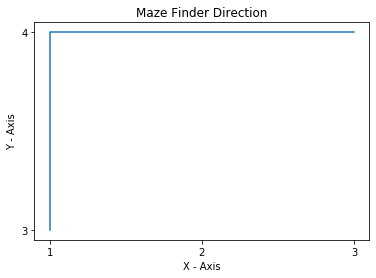

In [8]:
import matplotlib.pyplot as plt #Enter input here

sx = int(input("Enter Starting x value: "))
sy = int(input("Enter Starting y value: "))
gx = int(input("Enter Goal x value: "))
gy = int(input("Enter Goal y value: "))

pathway = dfs(coordinates, (sx,sy), (gx,gy))
print("Pathway of Game: ", pathway)

x_values = []
y_values = []


while True:
    x = input("Enter x values of pathway (enter space to stop input):")
    if x == " ":
        print("Done Entering X Values of Pathway!")
        while True:
            y = input("Enter y values of pathway (enter space to stop input):")
            if y == " ":
                print("Done Entering Y Values of Pathway!")
                break
            else:
                y_values.append(y)
        break
    else:
        x_values.append(x)

print(x_values)
print(y_values)
    
plt.title('Maze Finder Direction')   
plt.xlabel('X - Axis') 
plt.ylabel('Y - Axis') 
x = x_values
y = y_values
  
plt.plot(x, y) 
  
plt.show() 